# Unagged cross-section ratio of $(e,e'\pi^+)/(e,e'\pi^+)$ 

$$\left(\frac{\sigma(e,e'\pi^+)}{\sigma(e,e'\pi^+)}\right)$$

last edit Aug-29, 2022

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

## (1) Load data

In [3]:
load_SIDIS_data( Nruns = -1, do_e_e_pi_n=False, do_e_e_pi_FreeP=False, fdebug=0)

Done loading files.


## (2) Apply selection cuts not previously imposed

In [4]:
import time

In [5]:
print('number of pi+ events: %.1f'%(len(e_e_pi['piplus'])/1e6),'M')

number of pi+ events: 18.0 M


In [6]:
Nevents = -1
t0= time.time()
e_e_pi_pass_cuts,_,_,_ = apply_further_selection_cuts_to_data(fdebug=1, 
                                                            NeventsMax=Nevents,
                                                            NMaxPerSubset=500000);
t1 = time.time() 
print("Time elapsed: %.2f"%(t1 - t0), 'sec (%g us/event)'%((t1 - t0)/Nevents*1.e6)) # CPU seconds elapsed (floating point)

Applying selection cuts not previously imposed
(1) DATA
(e,e'π)
Apply a π+/π- acceptance matching cut on the in p-theta plane
Applying p-theta on cut for piplus on 17964852 events
Subdividing into 35 subsets up to 500000 events
Applying p-theta on cut for piminus on 7459373 events
Subdividing into 14 subsets up to 500000 events
Apply a cut on the missing mass of a (e,e'π) reaction: 1.3<Mx<5.0 GeV/c2
(e,e π+ )
17964852 events after original cut (100.0 %)
15489427 events after p-theta cut (86.2 %)
14790095 events after Mx cut (82.3 %)
14773080 events after Kinematical cut (82.2 %)
(e,e π- )
7459373 events after original cut (100.0 %)
6996838 events after p-theta cut (93.8 %)
6724550 events after Mx cut (90.1 %)
6717167 events after Kinematical cut (90.1 %)
 
Done applying selection cuts not previously imposed
Time elapsed: 168.60 sec (-1.68596e+08 us/event)


## (3) Extract cross-section ratio as a function of Bjorken $x$
For a standing proton use $x_B$, defined as
$ x_B = Q^2/2m_p\omega$

In [17]:
z_bins   = np.arange(0.3,0.85,0.05)
z_widths = 0.01*np.ones(len(z_bins))
x_bins   = np.linspace(0.2,0.6,11)
x        = (x_bins[1:] + x_bins[:-1])/2
x_err    = (x_bins[1:] - x_bins[:-1])/2
print('x bins:',x_bins)
print('z bins:',z_bins)
for z_bin,z_width in zip(z_bins,z_widths):
    z_min,z_max = z_bin-z_width, z_bin+z_width
    print('%.3f < z < %.3f:'%(z_min,z_max))

x bins: [0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52 0.56 0.6 ]
z bins: [0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8 ]
0.290 < z < 0.310:
0.340 < z < 0.360:
0.390 < z < 0.410:
0.440 < z < 0.460:
0.490 < z < 0.510:
0.540 < z < 0.560:
0.590 < z < 0.610:
0.640 < z < 0.660:
0.690 < z < 0.710:
0.740 < z < 0.760:
0.790 < z < 0.810:


In [18]:
var_label = "standing proton x"
# var_label = "moving proton x"

if   var_label == "standing proton x":
    var    = 'xB'
    xlabel = "Bjorken $x$"
    
elif var_label == "moving proton x":
    var    = 'xPrime2'
    xlabel = "$x' = Q^2/(W'^2 - m_N^2 + Q^2)$"    

# (4) Extract tabular data and save results to file

In [19]:
extract_SIDIS_ratio(df_dict  = e_e_pi_pass_cuts,
                           x_var    = var ,                           
                           x_bins   = x_bins,                           
                           z_bins   = z_bins,                           
                           z_widths = z_widths,                           
                           fdebug   = 0,
                           prefix   = 'Untagged_SIDIS_ratio_',                           
                           suffix   = '')

saved /Users/erezcohen/Desktop/data/BAND/Results/Untagged_SIDIS_ratio_Zmin0.290_Zmean_pips0.305_pims0.305_Zmax0.310.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Untagged_SIDIS_ratio_Zmin0.340_Zmean_pips0.350_pims0.350_Zmax0.360.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Untagged_SIDIS_ratio_Zmin0.390_Zmean_pips0.400_pims0.400_Zmax0.410.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Untagged_SIDIS_ratio_Zmin0.440_Zmean_pips0.450_pims0.450_Zmax0.460.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Untagged_SIDIS_ratio_Zmin0.490_Zmean_pips0.500_pims0.500_Zmax0.510.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Untagged_SIDIS_ratio_Zmin0.540_Zmean_pips0.550_pims0.550_Zmax0.560.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Untagged_SIDIS_ratio_Zmin0.590_Zmean_pips0.600_pims0.600_Zmax0.610.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Untagged_SIDIS_ratio_Zmin0.640_Zmean_pips0.650_pims0.650_Zmax0.660.csv
saved /Users/erezcohen/Desktop/data/BAND

## load results and plot them

Reading files from /Users/erezcohen/Desktop/data/BAND/Results/
reading Untagged_SIDIS_ratio_Zmin0.340_Zmean_pips0.350_pims0.350_Zmax0.360.csv
reading Untagged_SIDIS_ratio_Zmin0.590_Zmean_pips0.600_pims0.600_Zmax0.610.csv
reading Untagged_SIDIS_ratio_Zmin0.640_Zmean_pips0.650_pims0.650_Zmax0.660.csv
reading Untagged_SIDIS_ratio_Zmin0.440_Zmean_pips0.450_pims0.450_Zmax0.460.csv
reading Untagged_SIDIS_ratio_Zmin0.490_Zmean_pips0.500_pims0.500_Zmax0.510.csv
reading Untagged_SIDIS_ratio_Zmin0.690_Zmean_pips0.700_pims0.700_Zmax0.710.csv
reading Untagged_SIDIS_ratio_Zmin0.540_Zmean_pips0.550_pims0.550_Zmax0.560.csv
reading Untagged_SIDIS_ratio_Zmin0.390_Zmean_pips0.400_pims0.400_Zmax0.410.csv
reading Untagged_SIDIS_ratio_Zmin0.290_Zmean_pips0.305_pims0.305_Zmax0.310.csv
reading Untagged_SIDIS_ratio_Zmin0.740_Zmean_pips0.750_pims0.750_Zmax0.760.csv
reading Untagged_SIDIS_ratio_Zmin0.790_Zmean_pips0.800_pims0.800_Zmax0.810.csv
Done.


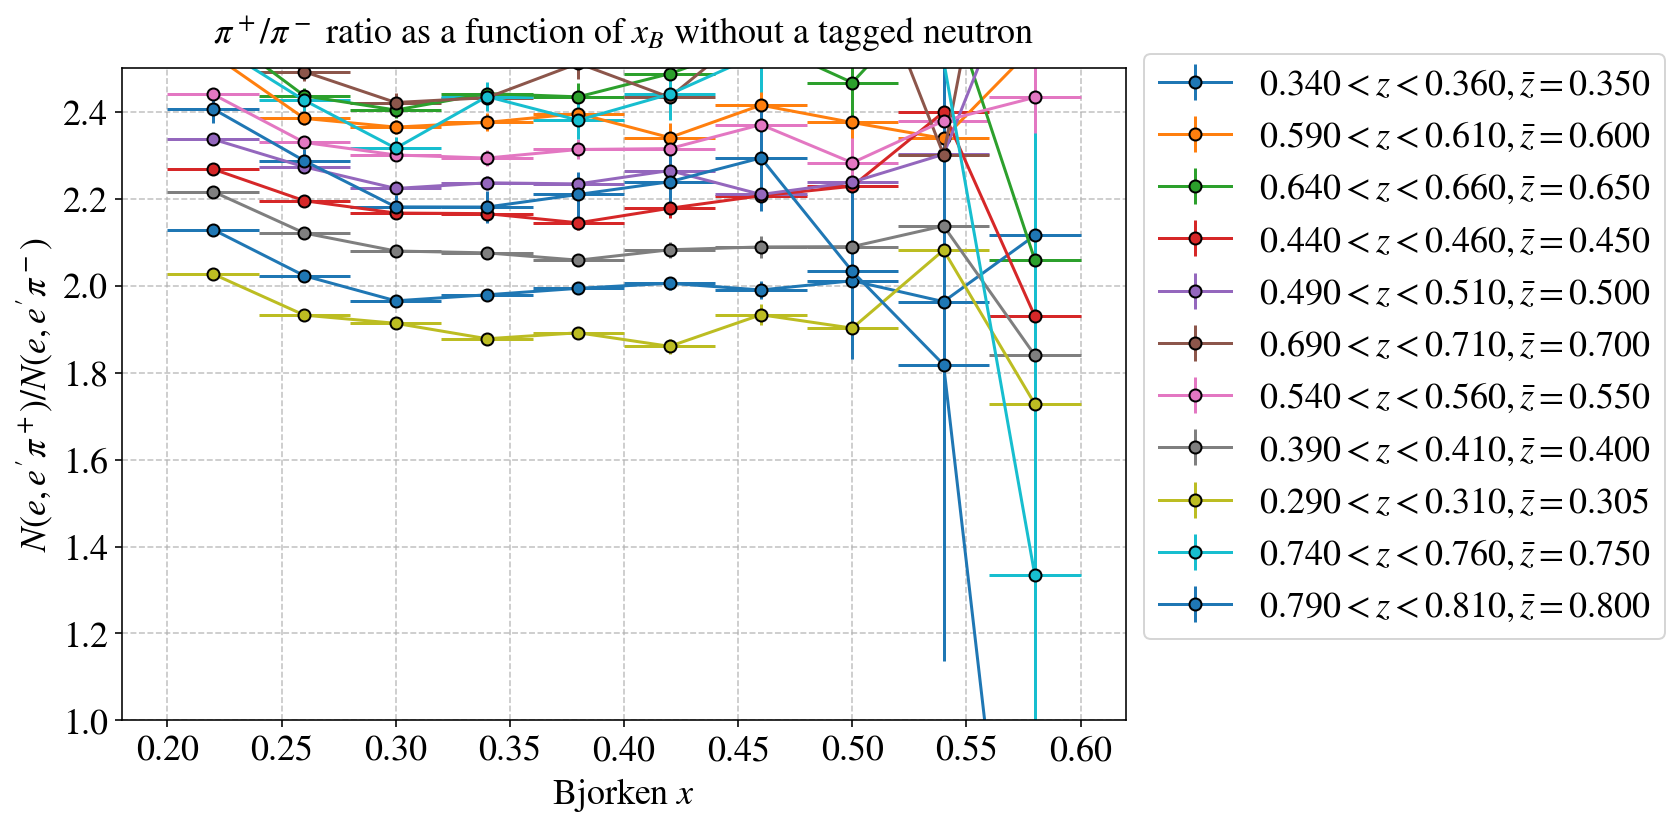

In [20]:
prefix = 'Untagged_SIDIS_ratio_'
suffix = ''
SIDIS_results = load_SIDIS_ratio(#z_bins=z_bins,z_widths=z_widths,
                                           prefix = prefix, suffix = suffix, doPlotResults=True)
ax = plt.gca()
ax.set_ylim(1,2.5);

# (5) Extract modified results
With no acceptance matching cut in $p-\theta$ plane

## (5.1) Results in different bins of M_x

In [21]:
M_x_min_arr = [0.5,1.0,1.5,2.0,2.5]
M_x_max_arr = [1.0,1.5,2.0,2.5,3.0]

In [22]:
for M_x_min,M_x_max in zip(M_x_min_arr,M_x_max_arr):
    print(M_x_min,M_x_max)
    extract_SIDIS_ratio(df_dict  = e_e_pi_pass_cuts,
                        x_var    = var ,
                        x_bins   = x_bins,
                        z_bins   = z_bins,
                        z_widths = z_widths,          
                        fdebug   = 0,
                        data_path= '/Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/',
                        prefix   = 'Untagged_SIDIS_ratio_',                    
                        suffix   = '_Mx_%.2f-%.2f_GeV'%(M_x_min,M_x_max),
                        M_x_min  = M_x_min,
                        M_x_max  = M_x_max)
    
print('done.')

0.5 1.0


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:187: RuntimeWarning: invalid value encountered in true_divide
  ret = arr.dtype.type(ret / rcount)


saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/Untagged_SIDIS_ratio_Zmin0.290_Zmean_pipsnan_pimsnan_Zmax0.310_Mx_0.50-1.00_GeV.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/Untagged_SIDIS_ratio_Zmin0.340_Zmean_pipsnan_pimsnan_Zmax0.360_Mx_0.50-1.00_GeV.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/Untagged_SIDIS_ratio_Zmin0.390_Zmean_pipsnan_pimsnan_Zmax0.410_Mx_0.50-1.00_GeV.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/Untagged_SIDIS_ratio_Zmin0.440_Zmean_pipsnan_pimsnan_Zmax0.460_Mx_0.50-1.00_GeV.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/Untagged_SIDIS_ratio_Zmin0.490_Zmean_pipsnan_pimsnan_Zmax0.510_Mx_0.50-1.00_GeV.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/Untagged_SIDIS_ratio_Zmin0.540_Zmean_pipsnan_pimsnan_Zmax0.560_Mx_0.50-1.00_GeV.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/Untagged_SIDIS_ratio_Zmin0.590_Zmean_pipsnan_pimsnan_Zmax0.610_Mx_0.50-1.00_GeV.csv
saved /Users/

## (5.2) extract results for many more bins in $z$

In [11]:
z_bins   = np.arange(0.3,0.8,0.01)
z_widths = 0.001*np.ones(len(z_bins))

prefix = 'Untagged_SIDIS_ratio_'
suffix = ''

In [12]:
extract_SIDIS_ratio(df_dict  = e_e_pi_pass_cuts,                                
                           x_var    = var ,                           
                           x_bins   = x_bins,                           
                           z_bins   = z_bins,                           
                           z_widths = z_widths,                           
                           fdebug   = 0,
                           prefix   = 'Untagged_SIDIS_ratio_',                           
                           suffix   = '')

saved /Users/erezcohen/Desktop/data/BAND/Results/Untagged_SIDIS_ratio_Zmin0.299_Zmean_pips0.301_pims0.301_Zmax0.301.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Untagged_SIDIS_ratio_Zmin0.309_Zmean_pips0.310_pims0.310_Zmax0.311.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Untagged_SIDIS_ratio_Zmin0.319_Zmean_pips0.320_pims0.320_Zmax0.321.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Untagged_SIDIS_ratio_Zmin0.329_Zmean_pips0.330_pims0.330_Zmax0.331.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Untagged_SIDIS_ratio_Zmin0.339_Zmean_pips0.340_pims0.340_Zmax0.341.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Untagged_SIDIS_ratio_Zmin0.349_Zmean_pips0.350_pims0.350_Zmax0.351.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Untagged_SIDIS_ratio_Zmin0.359_Zmean_pips0.360_pims0.360_Zmax0.361.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Untagged_SIDIS_ratio_Zmin0.369_Zmean_pips0.370_pims0.370_Zmax0.371.csv
saved /Users/erezcohen/Desktop/data/BAND

In [13]:
SIDIS_results = load_SIDIS_ratio_DataFrame(z_bins=z_bins,z_widths=z_widths,
                                           prefix = prefix, suffix = suffix, 
                                           doPlotResults=True)

NameError: name 'load_SIDIS_ratio_DataFrame' is not defined

## (5.3) Results with no acceptance matching cut in $p-\theta$ 

In [ ]:
Nevents = -1
t0= time.time()
e_e_pi_pass_cuts_no_p_theta_cut,_,_ = apply_further_selection_cuts_to_data(fdebug=2,
                                                                           NeventsMax=Nevents, 
                                                                           doAcceptanceMatchingCut=False);
t1 = time.time() 
print("Time elapsed: %.2f"%(t1 - t0), 'sec (%g us/event)'%((t1 - t0)/Nevents*1.e6)) # CPU seconds elapsed (floating point)

In [ ]:
save_SIDIS_ratio_DataFrame(df_dict  = e_e_pi_pass_cuts_no_p_theta_cut,                                
                           x_var    = var ,                           
                           x_bins   = x_bins,                           
                           z_bins   = z_bins,                           
                           z_widths = z_widths,                           
                           fdebug   = 0,
                           prefix   = 'Untagged_SIDIS_ratio_',                           
                           suffix   = '_No_AcceptanceMatchingCut')

In [ ]:
prefix = 'Untagged_SIDIS_ratio_'
suffix = '_No_AcceptanceMatchingCut'
SIDIS_results = load_SIDIS_ratio_DataFrame(prefix = prefix, suffix = suffix, doPlotResults=True)

# arxiv

In [ ]:

# Rpips2pims, Rpips2pims_errup, Rpips2pims_errdw = dict(), dict(), dict()
# Y, dY = dict(),dict()
# for z_bin,z_width in zip(z_bins,z_widths):
#     z_min,z_max = z_bin-z_width,z_bin+z_width
#     (Rpips2pims[z_bin],
#      Rpips2pims_errup[z_bin], 
#      Rpips2pims_errdw[z_bin],_,_) = compute_ratio_pips_to_pims(df_dict=e_e_pi_pass_cuts  , 
#                                                              var=var, 
#                                                              bins=x_bins, 
#                                                              z_min=z_min,z_max=z_max)

#     # fit to a constant 
#     y    = Rpips2pims[z_bin]
#     y_err= (Rpips2pims_errup[z_bin],Rpips2pims_errdw[z_bin])
#     p,cov = np.polyfit(x,y,deg=0,cov=True)
#     Y[z_bin],dY[z_bin] = p[0],cov[0,0]

#     # print(z_bin,Rpips2pims_n[z_bin],Rpips2pims_n_errup[z_bin],Rpips2pims_n_errdw[z_bin])
# print('done') 

In [ ]:
# fig = plt.figure(figsize=(9,6))
# ax  = fig.add_subplot(1,1,1)
# for z_bin,z_width in zip(z_bins,z_widths):
#     y    = Rpips2pims[z_bin]
#     y_err= (Rpips2pims_errup[z_bin],Rpips2pims_errdw[z_bin])
#     x_fit = np.linspace(np.min(x),np.max(x),100)
#     y_dw = (Y[z_bin]-dY[z_bin])*np.ones(len(x_fit))
#     y_up = (Y[z_bin]+dY[z_bin])*np.ones(len(x_fit))

#     # plot
#     l=ax.errorbar(x=x, xerr=x_err,  y=y, yerr=y_err,
#                 marker='o',markeredgecolor='k',
#                 label='$z=%.2f\pm%.2f, (\pi^+/\pi^-)=%.2f\pm%.2f$'%(z_bin,z_width,Y[z_bin],dY[z_bin]))
    
#     ax.fill_between( x_fit, y_dw, y_up, color=l[0].get_color(), alpha=0.1)
# set_axes(ax,xlabel,"$N(e,e'\pi^+)/N(e,e'\pi^-)$",
#          title="$\pi^+/\pi^-$ ratio as a function of $x_B$ without a tagged neutron",
#          do_add_grid=True, do_add_legend=True, fontsize=18,
#         );
# plt.legend(bbox_to_anchor=(1,1.05),loc='best',fontsize=18)

### Improve analysis timing with a focus on apply_further_selection_cuts_to_data()
Check timing of the function and improve it, as well as memory usage

In [ ]:
import timeit
timeit.timeit("apply_further_selection_cuts_to_data(fdebug=2, NeventsMax=-1)", 
              setup="from __main__ import apply_further_selection_cuts_to_data",number=1)

In [ ]:
e_e_pi[pi_ch].keys()
# retain only the most important features to reduce memory usage by a large pandas DataFrame
reduced_e_e_pi = dict()
for pi_ch in pi_charge_names:
    reduced_e_e_pi[pi_ch] = e_e_pi[pi_ch][['runnum','evnum',
                                           'e_P','e_Theta','e_Phi', 
                                           'pi_P', 'pi_Theta', 'pi_Phi', 
                                           'Q2', 'W', 'xB', 'Zpi',
                                           'M_X', 'e_DC_sector', 'pi_DC_sector']]
    reduced_e_e_pi[pi_ch] = reduced_e_e_pi[pi_ch].astype({"evnum": int,
                                                          "e_P":np.half,"e_Theta":np.half,"e_Phi":np.half,
                                                          "pi_P":np.half,'pi_Theta':np.half, 'pi_Phi':np.half,
                                                          'Q2':np.half, 'W':np.half, 'xB':np.half, 'Zpi':np.half,
                                                          'M_X':np.half, })

reduced_e_e_pi[pi_ch][0:5]

In [ ]:
for pi_ch in pi_charge_names:
    print(pi_ch)
    print('before cuts')
    print(e_e_pi[pi_ch].info(memory_usage="deep",verbose=False))
    print(' ')    
    # print('reduced dataframe before cuts')
    # print(reduced_e_e_pi[pi_ch].info(memory_usage="deep",verbose=False))
    # print(' ')
    print('after cuts')
    print(e_e_pi_pass_cuts[pi_ch].info(memory_usage="deep",verbose=False))
    print(' ')

In [ ]:
e_e_pi_pass_cuts[pi_ch].index